In [2]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tdc import Evaluator
import matplotlib.pyplot as plt



In [3]:
#load test data
df = pd.read_csv('../data/external_data_featurized.csv').dropna()
X_test, y_test = df.filter(regex='^feature.*'), df['y'] 

#load saved model
model = joblib.load("../models/ECE_trained_model.joblib")

# Predictions
y_pred = model.predict(X_test)
y_true = y_test

# Display metrics
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        62
           1       0.78      0.58      0.67        50

    accuracy                           0.74       112
   macro avg       0.75      0.73      0.73       112
weighted avg       0.75      0.74      0.73       112



In [4]:
from typing import Dict, Any
def evaluate_model(y_true, y_pred_proba, threshold: float = 0.5) -> Dict[str, float]:
    metrics = {
        'ROC-AUC': {'name': 'ROC-AUC', 'kwargs': {}},
        'PR-AUC': {'name': 'PR-AUC', 'kwargs': {}},
        'Accuracy': {'name': 'Accuracy', 'kwargs': {'threshold': threshold}},
        'Precision': {'name': 'Precision', 'kwargs': {'threshold': threshold}},
        'Recall': {'name': 'Recall', 'kwargs': {'threshold': threshold}},
        'F1': {'name': 'F1', 'kwargs': {'threshold': threshold}}
    }
    
    results = {}
    for metric_name, config in metrics.items():
        evaluator = Evaluator(name=config['name'])
        score = evaluator(y_true, y_pred_proba, **config['kwargs'])
        results[metric_name] = score
        print(f"{metric_name}: {score:.4f}")
    
    return results

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_true = y_test

evaluation_results = evaluate_model(y_true, y_pred_proba)


ROC-AUC: 0.8574
PR-AUC: 0.7691
Accuracy: 0.7411
Precision: 0.7838
Recall: 0.5800
F1: 0.6667


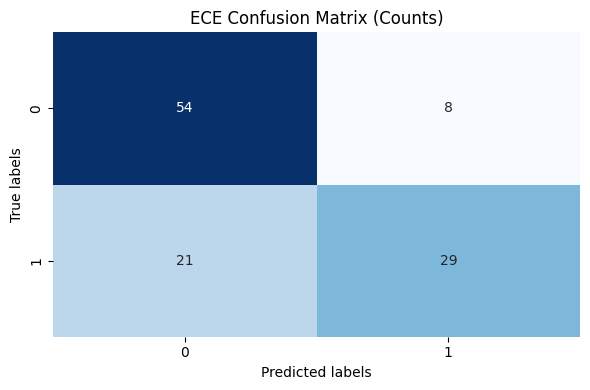

In [6]:
cm = confusion_matrix(y_true, y_pred)
    
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    
# Plot raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes, cbar=False)
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('ECE Confusion Matrix (Counts)')

    
    
plt.tight_layout()
plt.show()